In [66]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [67]:
df = pd.read_csv('/Users/JAISHREERAM/Documents/Churn_Modelling.csv')

In [68]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [69]:
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = df['Exited']

In [70]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [71]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [72]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [73]:
for columns in X.columns:
    print(f'{columns} : {X[columns].value_counts()}')

CreditScore : CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64
Geography : Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender : Gender
Male      5457
Female    4543
Name: count, dtype: int64
Age : Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64
Tenure : Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64
Balance : Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64
NumOfProducts : NumOfProducts
1    5084
2    4590
3     266
4      60

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

min_max_columns = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]

X[min_max_columns] = scaler.fit_transform(X[min_max_columns])

In [75]:
X["NumOfProducts"] = X["NumOfProducts"]/4

In [76]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,France,Female,0.324324,0.2,0.000000,0.25,1,1,0.506735
1,0.516,Spain,Female,0.310811,0.1,0.334031,0.25,0,1,0.562709
2,0.304,France,Female,0.324324,0.8,0.636357,0.75,1,0,0.569654
3,0.698,France,Female,0.283784,0.1,0.000000,0.50,0,0,0.469120
4,1.000,Spain,Female,0.337838,0.2,0.500246,0.25,1,1,0.395400
...,...,...,...,...,...,...,...,...,...,...
9995,0.842,France,Male,0.283784,0.5,0.000000,0.50,1,0,0.481341
9996,0.332,France,Male,0.229730,1.0,0.228657,0.25,1,1,0.508490
9997,0.718,France,Female,0.243243,0.7,0.000000,0.25,0,1,0.210390
9998,0.844,Germany,Male,0.324324,0.3,0.299226,0.50,1,0,0.464429


In [77]:
X_dummies = pd.get_dummies(X["Geography"], prefix='Geography')

# Drop the original 'Geography' column and concatenate the dummy variables
X = X.drop("Geography", axis=1)
X = pd.concat([X, X_dummies], axis=1)

In [78]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538,Female,0.324324,0.2,0.000000,0.25,1,1,0.506735,True,False,False
1,0.516,Female,0.310811,0.1,0.334031,0.25,0,1,0.562709,False,False,True
2,0.304,Female,0.324324,0.8,0.636357,0.75,1,0,0.569654,True,False,False
3,0.698,Female,0.283784,0.1,0.000000,0.50,0,0,0.469120,True,False,False
4,1.000,Female,0.337838,0.2,0.500246,0.25,1,1,0.395400,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,Male,0.283784,0.5,0.000000,0.50,1,0,0.481341,True,False,False
9996,0.332,Male,0.229730,1.0,0.228657,0.25,1,1,0.508490,True,False,False
9997,0.718,Female,0.243243,0.7,0.000000,0.25,0,1,0.210390,True,False,False
9998,0.844,Male,0.324324,0.3,0.299226,0.50,1,0,0.464429,False,True,False


In [79]:
label_enc_cols = ["Geography_France", "Geography_Germany", "Geography_Spain"]
X[label_enc_cols] = X[label_enc_cols].astype(int)
X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0})

In [80]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.25,1,1,0.506735,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.25,0,1,0.562709,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.75,1,0,0.569654,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.50,0,0,0.469120,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.25,1,1,0.395400,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.50,1,0,0.481341,1,0,0
9996,0.332,1,0.229730,1.0,0.228657,0.25,1,1,0.508490,1,0,0
9997,0.718,0,0.243243,0.7,0.000000,0.25,0,1,0.210390,1,0,0
9998,0.844,1,0.324324,0.3,0.299226,0.50,1,0,0.464429,0,1,0


In [81]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [82]:
count_0 = (y==0).sum()
count_1 = (y==1).sum()
count_0, count_1

(7963, 2037)

In [105]:
df_mod = pd.concat([X, y], axis=1)

In [84]:
df_mod

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,0.538,0,0.324324,0.2,0.000000,0.25,1,1,0.506735,1,0,0,1
1,0.516,0,0.310811,0.1,0.334031,0.25,0,1,0.562709,0,0,1,0
2,0.304,0,0.324324,0.8,0.636357,0.75,1,0,0.569654,1,0,0,1
3,0.698,0,0.283784,0.1,0.000000,0.50,0,0,0.469120,1,0,0,0
4,1.000,0,0.337838,0.2,0.500246,0.25,1,1,0.395400,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.50,1,0,0.481341,1,0,0,0
9996,0.332,1,0.229730,1.0,0.228657,0.25,1,1,0.508490,1,0,0,0
9997,0.718,0,0.243243,0.7,0.000000,0.25,0,1,0.210390,1,0,0,1
9998,0.844,1,0.324324,0.3,0.299226,0.50,1,0,0.464429,0,1,0,1


In [85]:
#1.Oversampling
df_0 = df_mod[df_mod['Exited']==0]

In [86]:
df_0

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
1,0.516,0,0.310811,0.1,0.334031,0.25,0,1,0.562709,0,0,1,0
3,0.698,0,0.283784,0.1,0.000000,0.50,0,0,0.469120,1,0,0,0
4,1.000,0,0.337838,0.2,0.500246,0.25,1,1,0.395400,0,0,1,0
6,0.944,1,0.432432,0.7,0.000000,0.50,1,1,0.050261,1,0,0,0
8,0.302,1,0.351351,0.4,0.566170,0.50,0,1,0.374680,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0.588,1,0.135135,0.7,0.618021,0.25,1,0,0.145854,1,0,0,0
9994,0.900,0,0.148649,0.2,0.000000,0.50,0,0,0.838890,1,0,0,0
9995,0.842,1,0.283784,0.5,0.000000,0.50,1,0,0.481341,1,0,0,0
9996,0.332,1,0.229730,1.0,0.228657,0.25,1,1,0.508490,1,0,0,0


In [87]:
df_1 = df_mod[df_mod['Exited']==1]

In [88]:
df_1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,0.538,0,0.324324,0.2,0.000000,0.25,1,1,0.506735,1,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.75,1,0,0.569654,1,0,0,1
5,0.590,1,0.351351,0.8,0.453394,0.50,1,0,0.748797,0,0,1,1
7,0.052,0,0.148649,0.4,0.458540,1.00,1,0,0.596733,0,1,0,1
16,0.606,1,0.540541,0.1,0.528513,0.25,1,0,0.025433,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,0.296,1,0.324324,0.3,0.605982,0.25,1,1,0.267193,0,1,0,1
9982,0.610,0,0.378378,0.7,0.546617,0.25,1,0,0.575729,0,1,0,1
9991,0.494,0,0.472973,0.4,0.352259,0.25,1,0,0.346899,1,0,0,1
9997,0.718,0,0.243243,0.7,0.000000,0.25,0,1,0.210390,1,0,0,1


In [89]:
count_0 = df_0['Exited'].shape[0]
count_1 = df_1['Exited'].shape[0]

In [90]:
count_0, count_1

(7963, 2037)

In [91]:
df_1 = df_1.sample(count_0, replace=True)

In [93]:
df_1.shape, df_0.shape

((7963, 13), (7963, 13))

In [94]:
df_over = pd.concat([df_0, df_1], axis=0)
df_over.Exited.value_counts()

Exited
0    7963
1    7963
Name: count, dtype: int64

In [95]:
df_over

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
1,0.516,0,0.310811,0.1,0.334031,0.25,0,1,0.562709,0,0,1,0
3,0.698,0,0.283784,0.1,0.000000,0.50,0,0,0.469120,1,0,0,0
4,1.000,0,0.337838,0.2,0.500246,0.25,1,1,0.395400,0,0,1,0
6,0.944,1,0.432432,0.7,0.000000,0.50,1,1,0.050261,1,0,0,0
8,0.302,1,0.351351,0.4,0.566170,0.50,0,1,0.374680,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,0.524,0,0.459459,0.5,0.577018,0.25,0,0,0.491502,0,0,1,1
5558,0.654,1,0.216216,0.3,0.505103,0.25,1,1,0.130487,0,1,0,1
5972,0.396,1,0.418919,0.9,0.432199,0.25,0,0,0.635117,0,1,0,1
5871,0.258,0,0.202703,0.2,0.829682,0.25,0,0,0.253840,1,0,0,1


In [96]:
X_over = df_over.drop(columns=["Exited"])
y_over = df_over['Exited']   

In [97]:
X_over.shape, y_over.shape

((15926, 12), (15926,))

In [98]:
y_over

1       0
3       0
4       0
6       0
8       0
       ..
8422    1
5558    1
5972    1
5871    1
1951    1
Name: Exited, Length: 15926, dtype: int64

In [99]:
X_over.shape, y_over.shape

((15926, 12), (15926,))

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42, stratify=y_over)

In [101]:
y_train.value_counts(), y_test.value_counts()

(Exited
 0    6370
 1    6370
 Name: count, dtype: int64,
 Exited
 0    1593
 1    1593
 Name: count, dtype: int64)

In [102]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(12,), activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=150)

y_preds = model.predict(X_test)
y_preds = np.round(y_preds)
print("Classification Report: \n", classification_report(y_test, y_preds))

Epoch 1/150


/opt/anaconda3/envs/cifar/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 322us/step - accuracy: 0.5082 - loss: 0.6951
Epoch 2/150
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - accuracy: 0.6354 - loss: 0.6580
Epoch 3/150
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.6759 - loss: 0.6233
Epoch 4/150
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.6991 - loss: 0.5942
Epoch 5/150
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7020 - loss: 0.5874
Epoch 6/150
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7231 - loss: 0.5627
Epoch 7/150
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7313 - loss: 0.5523
Epoch 8/150
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.7413 - loss: 0.5390
Epoch 9/150
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.7419 - loss: 0.5277
Epoch 10/150
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.7425 - loss: 0.5240
Epoch 11/150
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7524 - loss: 0.5155
Epoch 12/150
399/399 ━━━━━━━━━━

In [103]:
model.evaluate(X_test, y_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - accuracy: 0.7693 - loss: 0.4604


[0.4614221155643463, 0.770244836807251]

In [104]:
df_mod

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,0.538,0,0.324324,0.2,0.000000,0.25,1,1,0.506735,1,0,0,1
1,0.516,0,0.310811,0.1,0.334031,0.25,0,1,0.562709,0,0,1,0
2,0.304,0,0.324324,0.8,0.636357,0.75,1,0,0.569654,1,0,0,1
3,0.698,0,0.283784,0.1,0.000000,0.50,0,0,0.469120,1,0,0,0
4,1.000,0,0.337838,0.2,0.500246,0.25,1,1,0.395400,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.50,1,0,0.481341,1,0,0,0
9996,0.332,1,0.229730,1.0,0.228657,0.25,1,1,0.508490,1,0,0,0
9997,0.718,0,0.243243,0.7,0.000000,0.25,0,1,0.210390,1,0,0,1
9998,0.844,1,0.324324,0.3,0.299226,0.50,1,0,0.464429,0,1,0,1


In [40]:
#2. SMOTE
from imblearn.over_sampling import SMOTE
X_temp = df_mod.drop(columns=['Exited'])
y_temp = df_mod['Exited']
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X_temp, y_temp)

In [41]:
y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

In [43]:
'''import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(12,), activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])
'''
model.fit(X_train, y_train, epochs=150)

y_preds = model.predict(X_test)
y_preds = np.round(y_preds)
print("Classification Report: \n", classification_report(y_test, y_preds))

Epoch 1/150
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.7874 - loss: 0.4458
Epoch 2/150
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.7906 - loss: 0.4395
Epoch 3/150
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.7895 - loss: 0.4383
Epoch 4/150
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.7909 - loss: 0.4381
Epoch 5/150
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.7917 - loss: 0.4377
Epoch 6/150
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.7893 - loss: 0.4438
Epoch 7/150
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.7863 - loss: 0.4396
Epoch 8/150
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.7939 - loss: 0.4338
Epoch 9/150
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7924 - loss: 0.4410
Epoch 10/150
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7860 - loss: 0.4401
Epoch 11/150
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.7945 - loss: 0.4318
Epoch 12/150
399/39

In [44]:
model.evaluate(X_test, y_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.7825 - loss: 0.4469


[0.442104697227478, 0.784055233001709]

In [45]:
X_3 = df_mod.drop('Exited', axis=1)
y_3 = df_mod['Exited']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.2, random_state=15, stratify=y_3)

In [47]:
y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

In [61]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Exited', axis='columns')
    y_train = df_train['Exited']
    return X_train, y_train    

In [62]:
df_3_1 = df_mod[df_mod['Exited']==1]
df_3_0 = df_mod[df_mod['Exited']==0]

In [63]:
df_3_1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,0.538,0,0.324324,0.2,0.000000,0.25,1,1,0.506735,1,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.75,1,0,0.569654,1,0,0,1
5,0.590,1,0.351351,0.8,0.453394,0.50,1,0,0.748797,0,0,1,1
7,0.052,0,0.148649,0.4,0.458540,1.00,1,0,0.596733,0,1,0,1
16,0.606,1,0.540541,0.1,0.528513,0.25,1,0,0.025433,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,0.296,1,0.324324,0.3,0.605982,0.25,1,1,0.267193,0,1,0,1
9982,0.610,0,0.378378,0.7,0.546617,0.25,1,0,0.575729,0,1,0,1
9991,0.494,0,0.472973,0.4,0.352259,0.25,1,0,0.346899,1,0,0,1
9997,0.718,0,0.243243,0.7,0.000000,0.25,0,1,0.210390,1,0,0,1


In [64]:
df_3_0

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
1,0.516,0,0.310811,0.1,0.334031,0.25,0,1,0.562709,0,0,1,0
3,0.698,0,0.283784,0.1,0.000000,0.50,0,0,0.469120,1,0,0,0
4,1.000,0,0.337838,0.2,0.500246,0.25,1,1,0.395400,0,0,1,0
6,0.944,1,0.432432,0.7,0.000000,0.50,1,1,0.050261,1,0,0,0
8,0.302,1,0.351351,0.4,0.566170,0.50,0,1,0.374680,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0.588,1,0.135135,0.7,0.618021,0.25,1,0,0.145854,1,0,0,0
9994,0.900,0,0.148649,0.2,0.000000,0.50,0,0,0.838890,1,0,0,0
9995,0.842,1,0.283784,0.5,0.000000,0.50,1,0,0.481341,1,0,0,0
9996,0.332,1,0.229730,1.0,0.228657,0.25,1,1,0.508490,1,0,0,0


In [59]:
X_train, y_train = get_train_batch(df_3_0, df_3_1, 0, 2037)
print(X_train.shape, y_train.shape)  # Check shapes
print(type(X_train), type(y_train))  # Check types


(4074, 12) (4074,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [106]:
X_train, y_train = get_train_batch(df_3_0, df_3_1, 0, 2037)
model.fit(X_train, y_train, epochs=100)

y_pred1 = model.predict(X_test)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.7744 - loss: 0.4617
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7691 - loss: 0.4641
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.7722 - loss: 0.4524
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.7765 - loss: 0.4616
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.7806 - loss: 0.4465
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.7771 - loss: 0.4533
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.7852 - loss: 0.4432
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.7672 - loss: 0.4603
Epoch 9/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.7636 - loss: 0.4605
Epoch 10/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.7843 - loss: 0.4493
Epoch 11/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.7860 - loss: 0.4393
Epoch 12/100
128/12

In [107]:
X_train, y_train = get_train_batch(df_3_0, df_3_1, 2037, 4074)

model.fit(X_train, y_train, epochs=100)
y_pred2 = model.predict(X_test)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.7778 - loss: 0.4649
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.7881 - loss: 0.4572
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7712 - loss: 0.4658
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7815 - loss: 0.4641
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.7793 - loss: 0.4626
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.7845 - loss: 0.4560
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.7740 - loss: 0.4658
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.7887 - loss: 0.4477
Epoch 9/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7729 - loss: 0.4590
Epoch 10/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.7735 - loss: 0.4667
Epoch 11/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.7841 - loss: 0.4439
Epoch 12/100
128/12

In [108]:
X_train, y_train = get_train_batch(df_3_0, df_3_1, 4074, 6111)

model.fit(X_train, y_train, epochs=100)
y_pred3 = model.predict(X_test)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.7932 - loss: 0.4474
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.7834 - loss: 0.4497
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.7807 - loss: 0.4459
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.7854 - loss: 0.4433
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.7899 - loss: 0.4367
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.7854 - loss: 0.4397
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.7814 - loss: 0.4585
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.7752 - loss: 0.4531
Epoch 9/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.7850 - loss: 0.4460
Epoch 10/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.7882 - loss: 0.4397
Epoch 11/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7844 - loss: 0.4494
Epoch 12/100
128/12

In [109]:
X_train, y_train = get_train_batch(df_3_0, df_3_1, 6111, 7963)

model.fit(X_train, y_train, epochs=100)
y_pred4= model.predict(X_test)

Epoch 1/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.7959 - loss: 0.4475
Epoch 2/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.7900 - loss: 0.4492
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.7900 - loss: 0.4432
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.7884 - loss: 0.4409
Epoch 5/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.7971 - loss: 0.4331
Epoch 6/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.7871 - loss: 0.4466
Epoch 7/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7868 - loss: 0.4368
Epoch 8/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7952 - loss: 0.4430
Epoch 9/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.7895 - loss: 0.4418
Epoch 10/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.7937 - loss: 0.4373
Epoch 11/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.7861 - loss: 0.4542
Epoch 12/100
122/12

In [110]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i] + y_pred4[i]
    if n_ones<2:
        y_pred_final[i] = 0
    else:
        y_pred_final[i] = 1

In [111]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1593
           1       0.77      0.82      0.79      1593

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



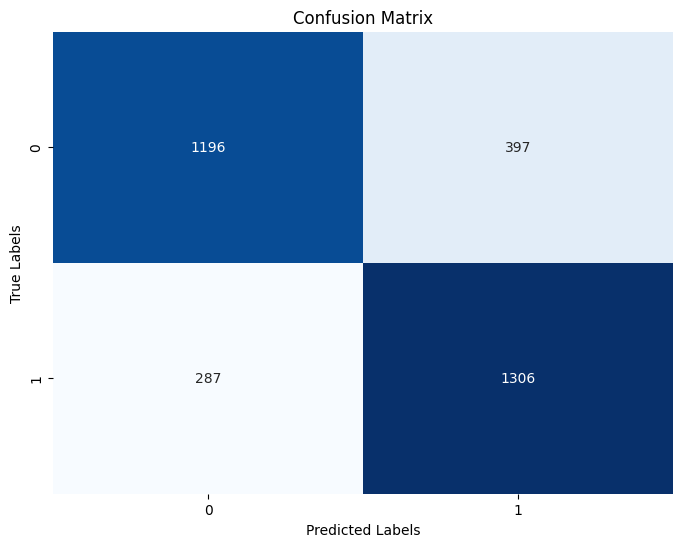

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_pred and y_test are defined
# y_pred is the predicted labels and y_test is the true labels

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_final)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [114]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_final)

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 78.53%
